In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

from model import EarthVisionModel

In [54]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        _dict = pickle.load(fo, encoding='bytes')
    return _dict

label_meta = unpickle("./meta")

In [55]:
label_meta

{b'fine_label_names': [b'apple',
  b'aquarium_fish',
  b'baby',
  b'bear',
  b'beaver',
  b'bed',
  b'bee',
  b'beetle',
  b'bicycle',
  b'bottle',
  b'bowl',
  b'boy',
  b'bridge',
  b'bus',
  b'butterfly',
  b'camel',
  b'can',
  b'castle',
  b'caterpillar',
  b'cattle',
  b'chair',
  b'chimpanzee',
  b'clock',
  b'cloud',
  b'cockroach',
  b'couch',
  b'crab',
  b'crocodile',
  b'cup',
  b'dinosaur',
  b'dolphin',
  b'elephant',
  b'flatfish',
  b'forest',
  b'fox',
  b'girl',
  b'hamster',
  b'house',
  b'kangaroo',
  b'keyboard',
  b'lamp',
  b'lawn_mower',
  b'leopard',
  b'lion',
  b'lizard',
  b'lobster',
  b'man',
  b'maple_tree',
  b'motorcycle',
  b'mountain',
  b'mouse',
  b'mushroom',
  b'oak_tree',
  b'orange',
  b'orchid',
  b'otter',
  b'palm_tree',
  b'pear',
  b'pickup_truck',
  b'pine_tree',
  b'plain',
  b'plate',
  b'poppy',
  b'porcupine',
  b'possum',
  b'rabbit',
  b'raccoon',
  b'ray',
  b'road',
  b'rocket',
  b'rose',
  b'sea',
  b'seal',
  b'shark',
  b'shre

In [56]:
model = EarthVisionModel()

In [57]:
model

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(144, eps=1e-05, mom

In [58]:
flag = np.zeros((32,256))

In [22]:
# predict test images 
for i in range(32):
    img = Image.open(f"./test_X/{i}.jpg")
    img = preprocess(img)
    img = img.unsqueeze(0)
    pred = model(img)
    pred = torch.argmax(pred, dim=1).item()
    flag[i][pred] = 1

In [23]:
flag

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

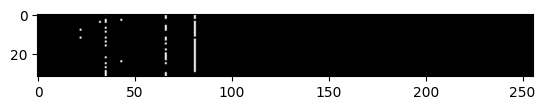

In [24]:
plt.imshow(flag, cmap="gray")
plt.show()

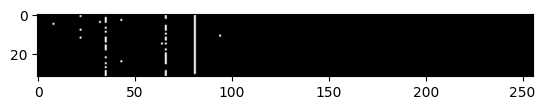

In [26]:
for i in range(32, 64):
    img = Image.open(f"./test_X/{i}.jpg")
    img = preprocess(img)
    img = img.unsqueeze(0)
    pred = model(img)
    pred = torch.argmax(pred, dim=1).item()
    flag[i%32][pred] = 1

plt.imshow(flag, cmap="gray")
plt.show()

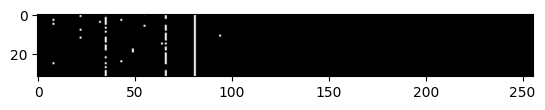

In [27]:
for i in range(64, 96):
    img = Image.open(f"./test_X/{i}.jpg")
    img = preprocess(img)
    img = img.unsqueeze(0)
    pred = model(img)
    pred = torch.argmax(pred, dim=1).item()
    flag[i%32][pred] = 1

plt.imshow(flag, cmap="gray")
plt.show()

In [28]:
#get test_X size
import os
len(os.listdir("./test_X"))

8192

In [30]:
# get label_meta size
len(label_meta[b'fine_label_names'])

100

In [31]:
# make flag with dimentions of test_X and label_meta
flag = np.zeros((100,8192))

In [61]:
for i in range(len(os.listdir("./test_X"))):
    img = Image.open(f"./test_X/{i}.jpg")
    img = preprocess(img)
    img = img.unsqueeze(0)
    pred = model(img)
    pred = torch.argmax(pred, dim=1).item()
    flag[pred%32][i%256] = 1

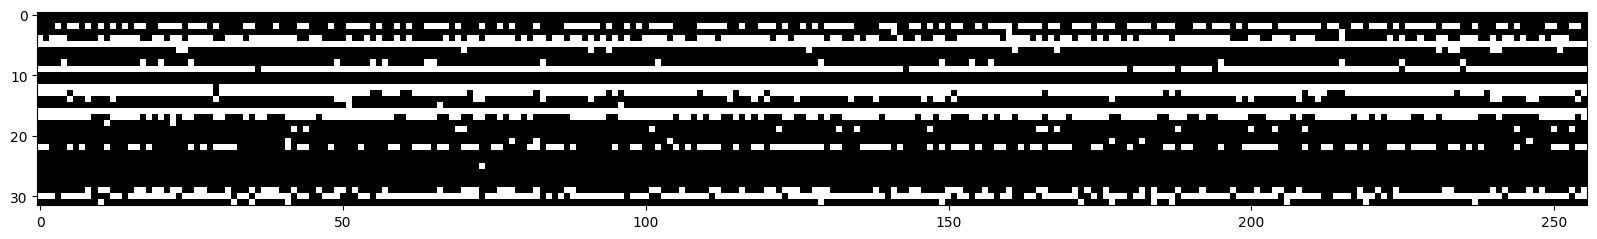

In [62]:
plt.imshow(flag, cmap="gray")
#increase figure size

plt.show()

In [46]:
#save the flag as image
matplotlib.image.imsave('flag.png', flag, cmap="gray")


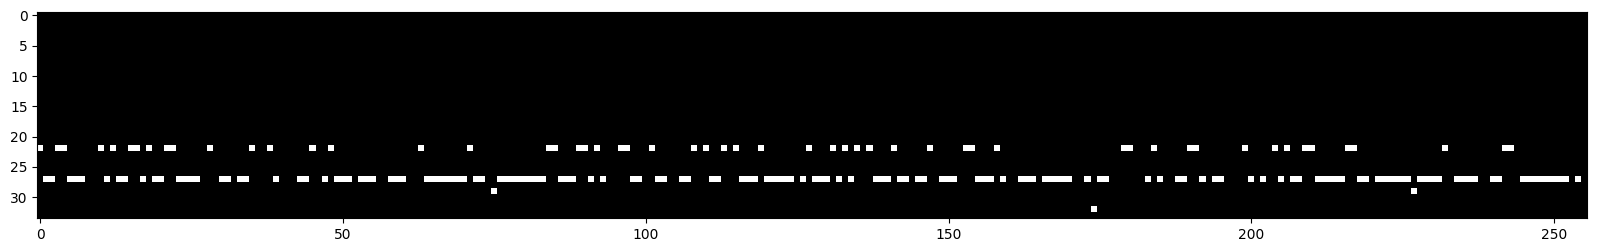

In [47]:
# undersample the flag to (32,256)
flag = flag[::3,::32]
plt.imshow(flag, cmap="gray")